In [1]:
from data import Data
from feature_importance import FeatureImportance
from dimension_reduction import display_umap_2d_plot, PCADimensionReduction
from kmeans_clustering import k_means_clustering_for_different_k


In [2]:
data_filepath = "data/SC_integration/counts_ctc_simulated_123_5k.tsv"
true_results_filepath = "data/SC_integration/ids_ctc_simulated_123_5k.tsv"
train_indices_filepath = "data/SC_integration/train_indices.npy"
test_indices_filepath = "data/SC_integration/test_indices.npy"
SEED = 42

data_object = Data(data_filepath, true_results_filepath)
train_data, test_data, train_true_results, test_true_results =  data_object.load_train_test_split(train_indices_filepath, test_indices_filepath)
scaled_train_data, scaled_test_data = data_object.get_scaled_train_test_data()

## Najważniejsze zmienne

/home/melehean/Important_Stuff/Studies/GUMED/ctc-env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy: 0.996096291476903
Test accuracy: 0.9916540212443096
Train confusion matrix:
[[3027   12]
 [   0   35]]
Precision: 0.7446808510638298
Recall: 1.0
Test confusion matrix:
[[1298    5]
 [   6    9]]
Precision: 0.6428571428571429
Recall: 0.6
Number of genes that matter: 43 out of 2000  (2.15%)


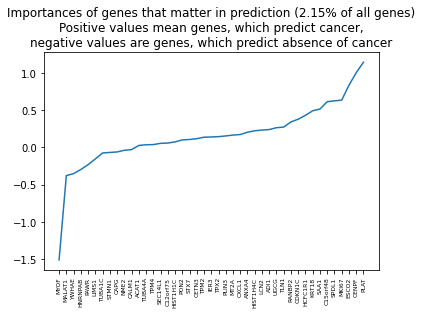

In [3]:
converted_train_data, converted_test_data, converted_train_true_results, converted_test_true_results = data_object.get_converted_train_test_split()
columns = train_data.columns.values.tolist()
feature_importance_object = FeatureImportance(converted_train_data, converted_test_data, converted_train_true_results, converted_test_true_results, columns)
feature_importance_object.logistic_regression_coefficients_importance()

Widzimy, że tylko niewielka część genów będzie służyła do określenia, czy dany materiał generyczny należy do komórki raka. Poza tym na wykresie widać, że jest więcej genów śwadczących o obecności raka, niż genów, które mogłyby służyć do predykcji jego nieobecności.

## PCA

PCA - principal component analysis is about creating lines in multidimensional space, that take into account which variable differ the samples the most. PCA lines (called PC) also correspond to some percentage of total data variation and coefficients of these lines to concrete variables. The bar plot that shows this variation percentage is called scree plot.

Below we see scree plots for some amount of PC lines. The first line (PC1) has about 14% of total variation, which seems to be a little. We see that only a few PCA lines have significant percentage of total variation.

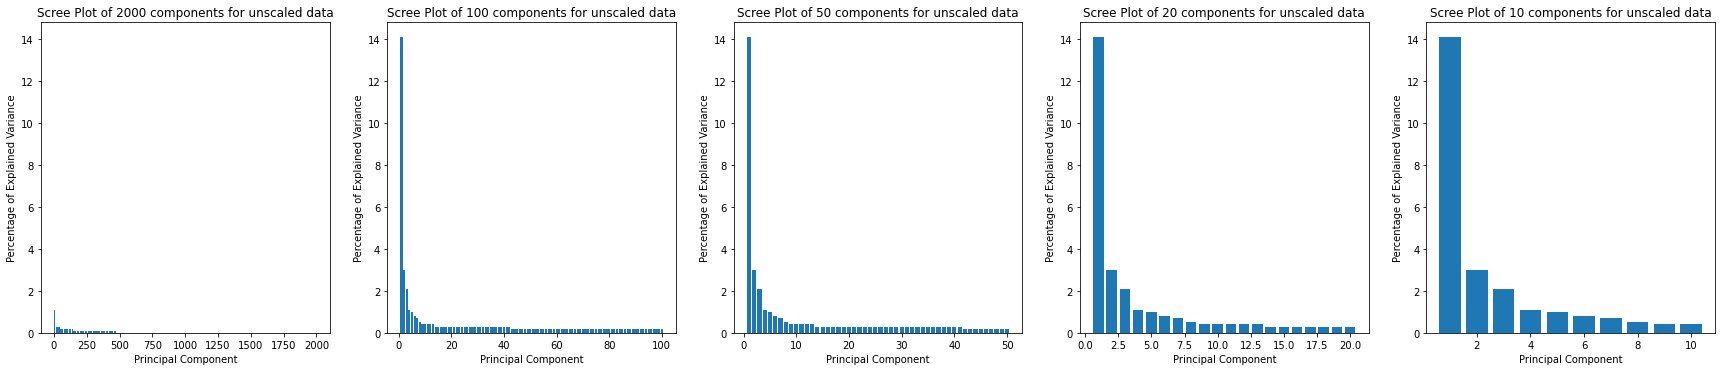

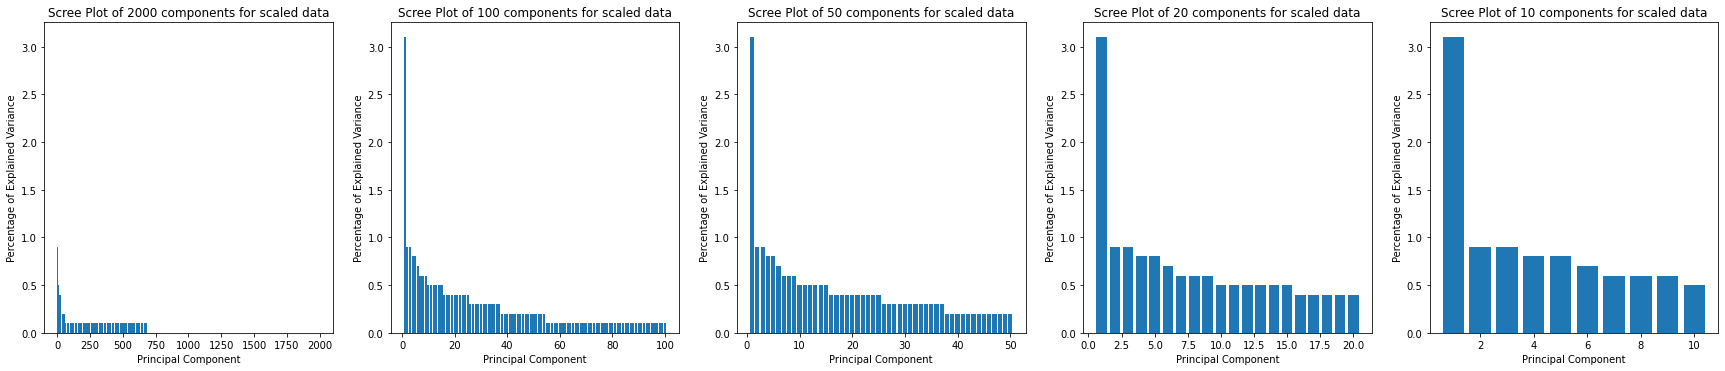

In [4]:
pca_object = PCADimensionReduction(train_data, scaled_train_data, train_true_results, SEED)
components_amounts_list = [2000, 100, 50, 20, 10]
pca_object.generate_scree_plots(components_amounts_list)

Here we take only 2 PCs, which are responsible for about 17% of total variation, which is not much and the plot should be considered as noisy. We see that there are 3 large groups of cells and the CTC cells let's say outliers of these groups. Moreover, CTC cells differ mostly in PC1.

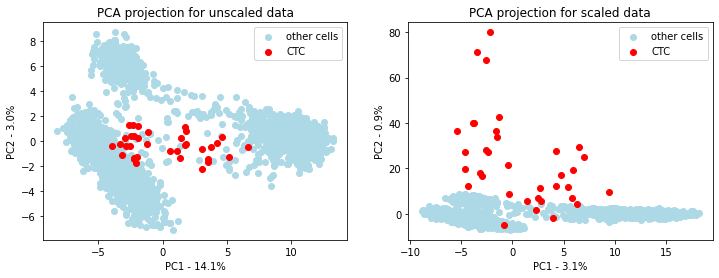

In [5]:
pca_object.display_pc1_pc2_plot()

Here we have the biggest loading scores for PC1 - they are coefficients of unit vector of the PC1 line, so in some way coefficient of PC1. Variables with the biggest loading scores should differ samples the most.

In [6]:
top_variables = pca_object.get_most_important_variables_from_pc1(10)
top_variables

S100A9     0.239765
CST3       0.217977
CTSS       0.187347
LST1       0.180377
LGALS1     0.177783
S100A4     0.154780
FTL        0.148237
S100A6     0.147649
S100A11    0.145217
SAT1       0.142339
dtype: float64

## UMAP

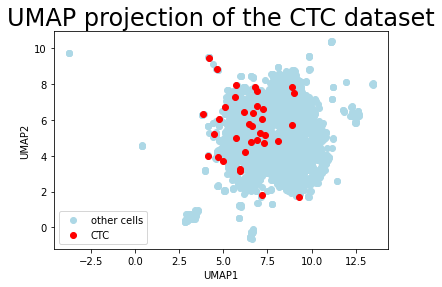

In [7]:
display_umap_2d_plot(scaled_train_data, train_true_results, SEED)

## K-means CLustering

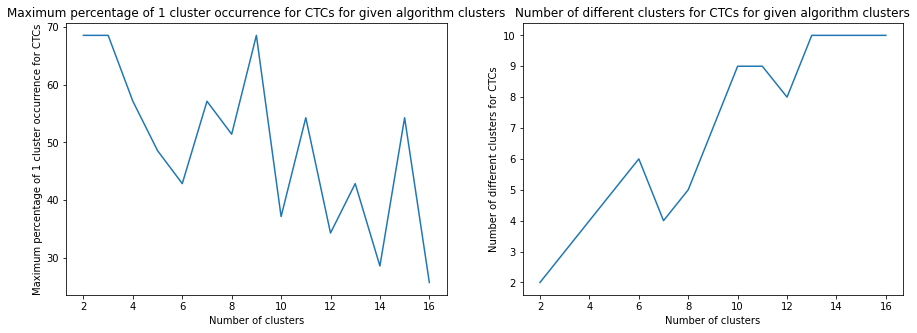

In [8]:
k_array = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
k_means_clustering_for_different_k(scaled_train_data, train_true_results, k_array, SEED)

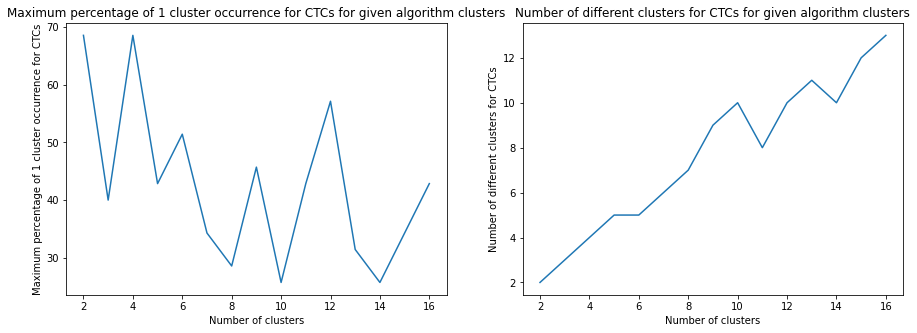

In [9]:
k_means_clustering_for_different_k(scaled_train_data, train_true_results, k_array, SEED, pca=20)

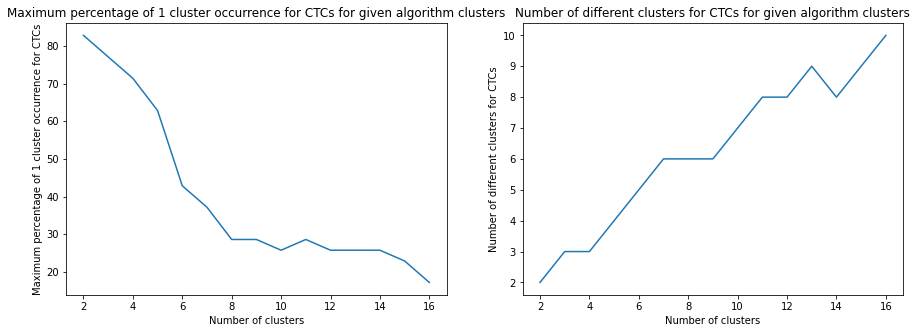

In [12]:
pc1_top_variables = pca_object.get_most_important_variables_from_pc1(20)
k_means_clustering_for_different_k(scaled_train_data[pc1_top_variables.index], train_true_results, k_array, SEED)